In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.stats.weightstats as statsmod

# Two sample : Independent Samples

In [2]:
data = pd.read_csv('A+&+B+shingles.csv')

In [3]:
data.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [4]:
df_A = data['A']
df_A

0     0.44
1     0.61
2     0.47
3     0.30
4     0.15
5     0.24
6     0.16
7     0.20
8     0.20
9     0.20
10    0.26
11    0.14
12    0.33
13    0.13
14    0.72
15    0.51
16    0.28
17    0.39
18    0.39
19    0.25
20    0.16
21    0.20
22    0.22
23    0.42
24    0.24
25    0.21
26    0.49
27    0.34
28    0.36
29    0.29
30    0.27
31    0.40
32    0.29
33    0.43
34    0.34
35    0.37
Name: A, dtype: float64

In [5]:
df_B = data['B'][0:31]
df_B

0     0.14
1     0.15
2     0.31
3     0.16
4     0.37
5     0.18
6     0.42
7     0.58
8     0.25
9     0.41
10    0.17
11    0.13
12    0.23
13    0.11
14    0.10
15    0.19
16    0.22
17    0.44
18    0.11
19    0.11
20    0.31
21    0.43
22    0.26
23    0.18
24    0.44
25    0.43
26    0.16
27    0.52
28    0.36
29    0.22
30    0.39
Name: B, dtype: float64

In [6]:
df_A.describe()

count    36.000000
mean      0.316667
std       0.135731
min       0.130000
25%       0.207500
50%       0.290000
75%       0.392500
max       0.720000
Name: A, dtype: float64

In [7]:
df_B.describe()

count    31.000000
mean      0.273548
std       0.137296
min       0.100000
25%       0.160000
50%       0.230000
75%       0.400000
max       0.580000
Name: B, dtype: float64

In [8]:
##step1 : Identify data given
n1_df_A = df_A.count()
xbar1_df_A = df_A.mean()
sd1_df_A = df_A.std()

print("n1_df_A =", n1_df_A ,"xbar1_df_A =", xbar1_df_A, "sd1_df_A =", sd1_df_A)

n2_df_B = df_B.count()
xbar2_df_B = df_B.mean()
sd2_df_B = df_B.std()

print("n2_df_B =", n2_df_B ,"xbar2_df_B =", xbar2_df_B, "sd2_df_B =", sd2_df_B)

alpha = 0.05   
dof = n1_df_A + n2_df_B - 2

print("alpha =", alpha, "dof =", dof)

n1_df_A = 36 xbar1_df_A = 0.3166666666666666 sd1_df_A = 0.13573082605973166
n2_df_B = 31 xbar2_df_B = 0.2735483870967742 sd2_df_B = 0.13729647694185443
alpha = 0.05 dof = 65


In [9]:
##step3 : Calculate Tstat

##sp2 = (SS_sugar_d + SS_sugar_nd) / (dof_sugar_d + dof_sugar_nd) (formula to calculate standard deviation of the pool)

SS_df_A = (sd1_df_A)*(sd1_df_A)*(n1_df_A-1)
SS_df_B = (sd2_df_B)*(sd2_df_B)*(n2_df_B-1)

sp2 = (SS_df_A + SS_df_B) / ((n1_df_A-1) + (n2_df_B-1))

Tstat = (xbar1_df_A - xbar2_df_B) / np.sqrt((sp2/n1_df_A) + (sp2/n2_df_B))
Tstat

1.2896282719661107

In [10]:
sp2

0.018620148883374685

In [11]:
##step4&5 : Calculate Tcrit

Tcrit = stats.t.isf(0.025,dof)
Tcrit

1.9971379077520126

In [12]:
##step6 : Calculate P Value

Pvalue = 2*stats.t.sf(Tstat, dof)
Pvalue

0.2017496571835333

In [13]:
tstat, Pvalue, df = statsmod.ttest_ind(df_A,df_B,usevar = 'pooled', alternative = 'two-sided')

print ("Tstat = ", tstat, "Pvalue = ", Pvalue, "Degrees of Freedom =", df)

Tstat =  1.2896282719661123 Pvalue =  0.20174965718353277 Degrees of Freedom = 65.0


# Problem 3 Answer (using independent two samples T-test method) : P Value is higher than alpha value. 

#Hence, Fail to Reject H0. (i.e. means for shingles A and B are equal)

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [15]:
sns.set()

In [16]:
data.fillna(value=0, inplace = True)

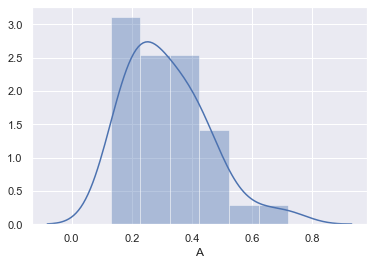

In [17]:
fig_dims = (10, 5)
sns.distplot(data['A'], kde=True)

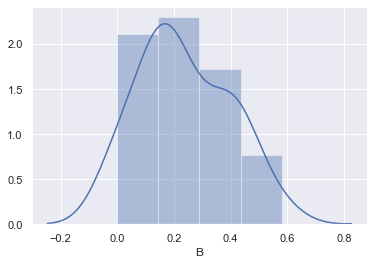

In [18]:
fig_dims = (10, 5)
sns.distplot(data['B'], kde=True)

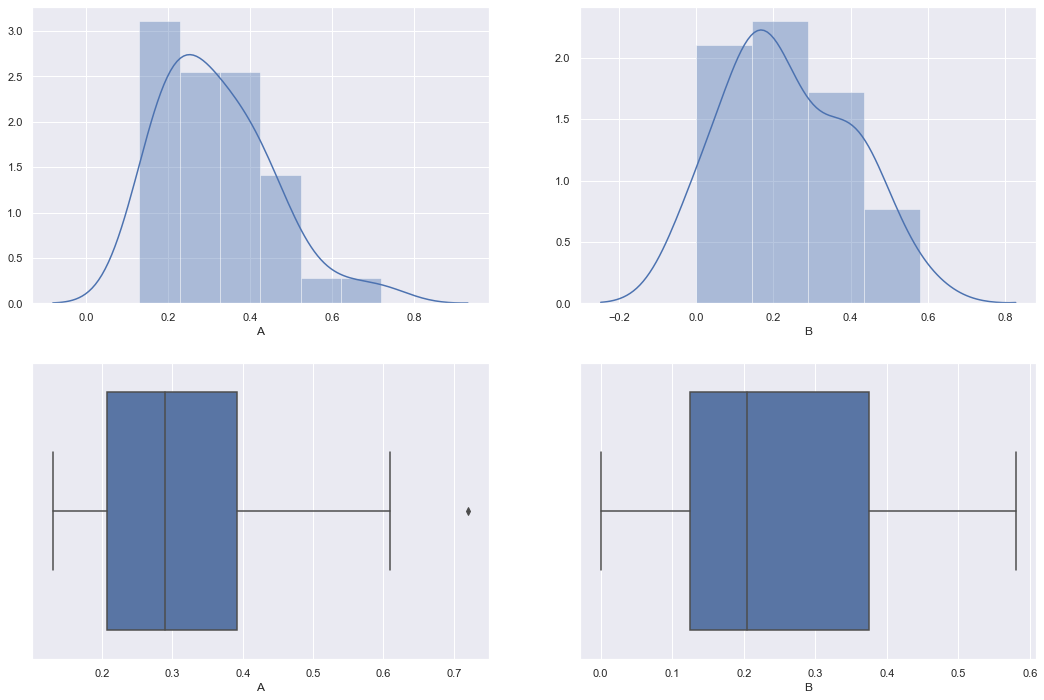

In [19]:
fig_dims = (18, 12)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=fig_dims)

sns.distplot(data['A'], kde=True, ax=axs[0,0])
sns.distplot(data['B'], kde=True, ax=axs[0,1])

sns.boxplot(x= 'A', data=data, ax=axs[1,0]) ;
sns.boxplot(x= 'B', data=data, ax=axs[1,1]) 

In [20]:
from scipy.stats import shapiro

In [21]:
stat, p = shapiro(data['A'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian/Normal Distribution')
else:
	print('Probably not Gaussian/Normal Distribution')

stat=0.938, p=0.043
Probably not Gaussian/Normal Distribution


In [22]:
stat, p = shapiro(data['B'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian/Normal Distribution')
else:
	print('Probably not Gaussian/Normal Distribution')

stat=0.949, p=0.100
Probably Gaussian/Normal Distribution


----------------------------------------------END of 3.1-----------------------------------------------------------------